In [2]:
import numpy as np
import pandas as pd
#import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

In [5]:
file=r"D:\EXCELL\Flight_Data.csv"
df = pd.read_csv(file, encoding = 'unicode_escape')

In [6]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,0,Spicejet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,01-01-2018
1,1,Spicejet,SG-8157,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,02-01-2018
2,2,Airasia,I5-764,Delhi,Morning,zero,Morning,Mumbai,Economy,2.17,1,5956,03-01-2018
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,04-01-2018
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,05-01-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,301201,Vistara,UK-747,Delhi,Morning,one,Night,Mumbai,Economy,113.83,1,14985,15-03-2018
354,301202,Air India,AI-512,Delhi,Afternoon,one,Night,Mumbai,Economy,97.58,1,14670,16-03-2018
355,301203,Air India,AI-537,Delhi,Evening,one,Morning,Mumbai,Economy,115.83,1,15195,17-03-2018
356,301204,Vistara,UK-977,Delhi,Evening,zero,Night,Mumbai,Economy,622.25,1,15720,18-03-2018


#here we used the already cleaned data

In [135]:
# Get the maximum price
max_price = df['price'].max()
print(f"Maximum price: {max_price}")

# Get the minimum price
min_price = df['price'].min()
print(f"Minimum price: {min_price}")

Maximum price: 2512780
Minimum price: 5949


In [7]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
date                 object
dtype: object

In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [9]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
date                 object
dtype: object

In [14]:
df['stops']=df['stops'].astype("string")

In [15]:
df['days_left']=pd.to_numeric(df['days_left'],errors='coerce')

In [16]:
df.dtypes

airline                     object
flight                      object
source_city                 object
departure_time              object
stops               string[python]
arrival_time                object
destination_city            object
class                       object
duration                   float64
days_left                    int64
price                        int64
date                        object
dtype: object

***EXPLORATORY DATA ANALYSIS***

**Histogram to visualize the distribution of price values**

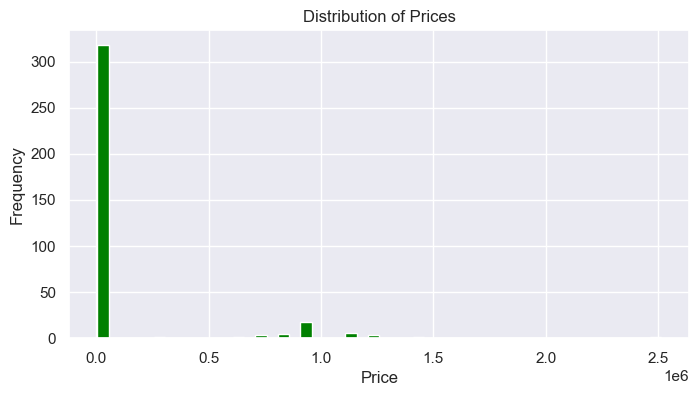

In [134]:
plt.hist(df['price'], bins=50, color='green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

**DENSITY PLOT**

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


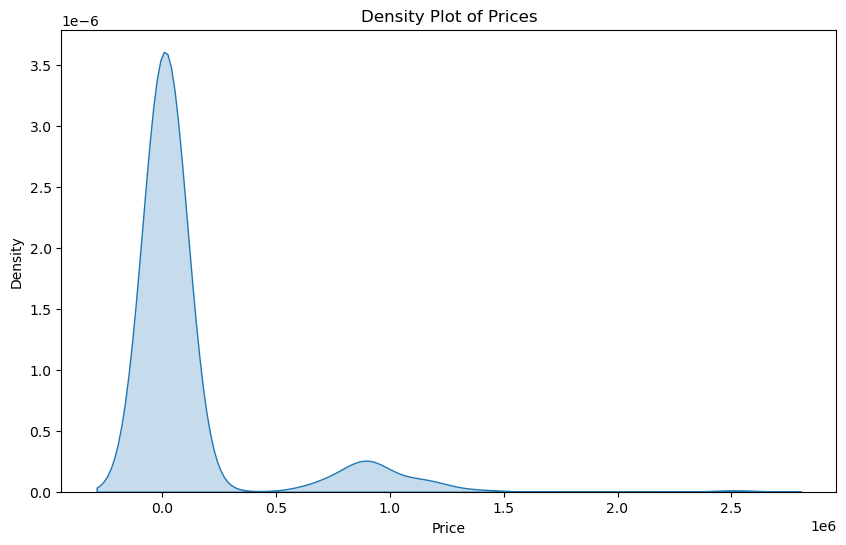

In [25]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], fill=True)
plt.title('Density Plot of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

**Relationship Between DURATION & PRICE**

Scatter Plot with Regression Line

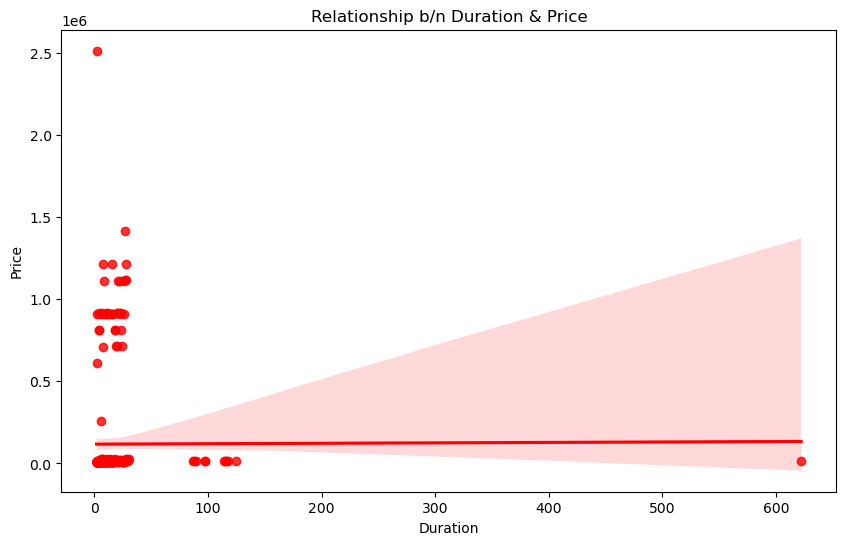

In [32]:
plt.figure(figsize=(10, 6))
sns.regplot(x='duration', y='price', data=df, color='red')
plt.title('Relationship b/n Duration & Price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

**BAR GRAPH**

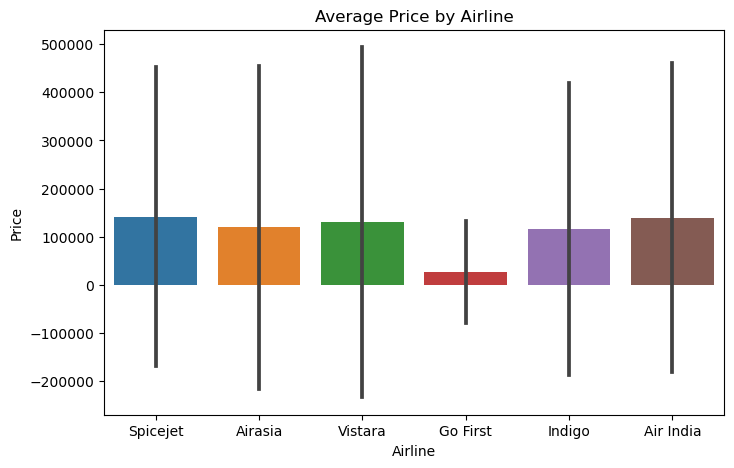

In [43]:
plt.figure(figsize=(8, 5))
sns.barplot(x='airline', y='price', data=df, errorbar='sd')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

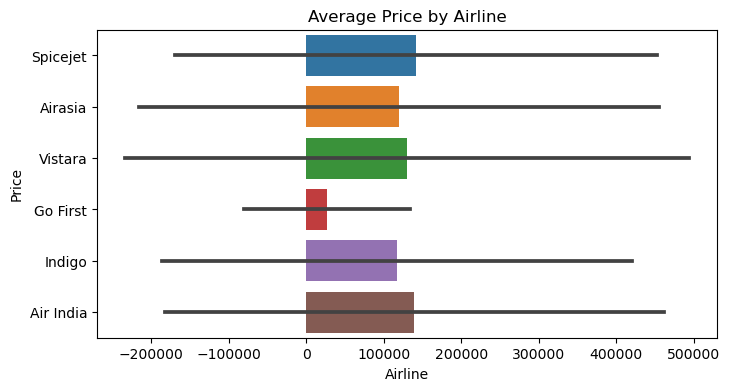

In [42]:
plt.figure(figsize=(8, 4))
sns.barplot(y='airline', x='price', data=df, errorbar='sd')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

**Top Airlines by Number of Flights**

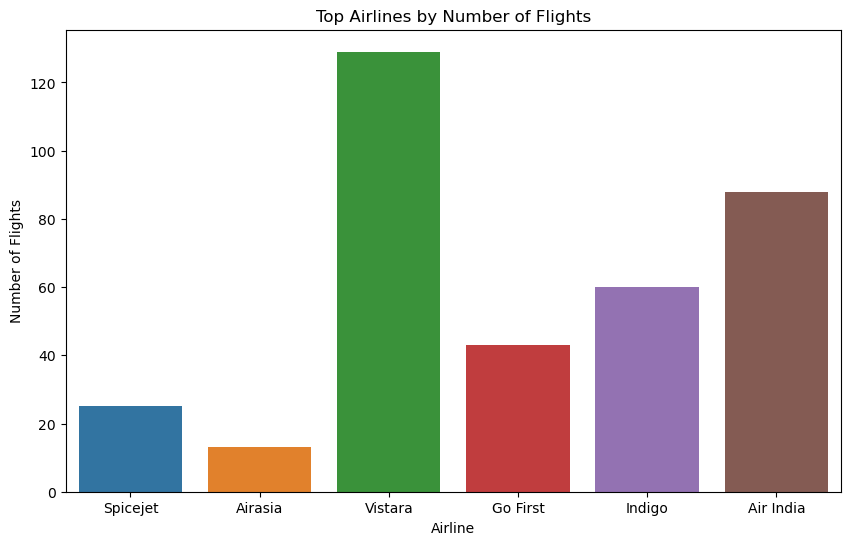

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', data=df)
plt.title('Top Airlines by Number of Flights')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

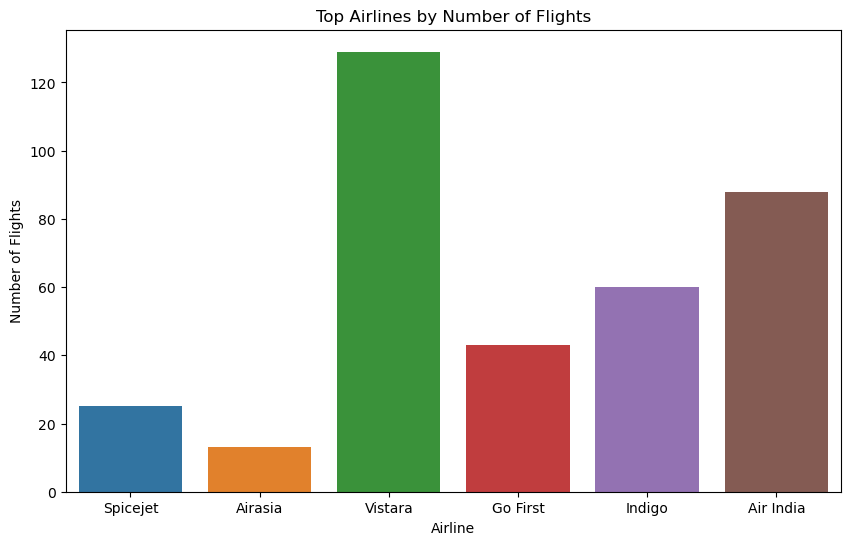

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', data=df, orient='h')
plt.title('Top Airlines by Number of Flights')
plt.ylabel('Number of Flights')
plt.xlabel('Airline')
plt.show()

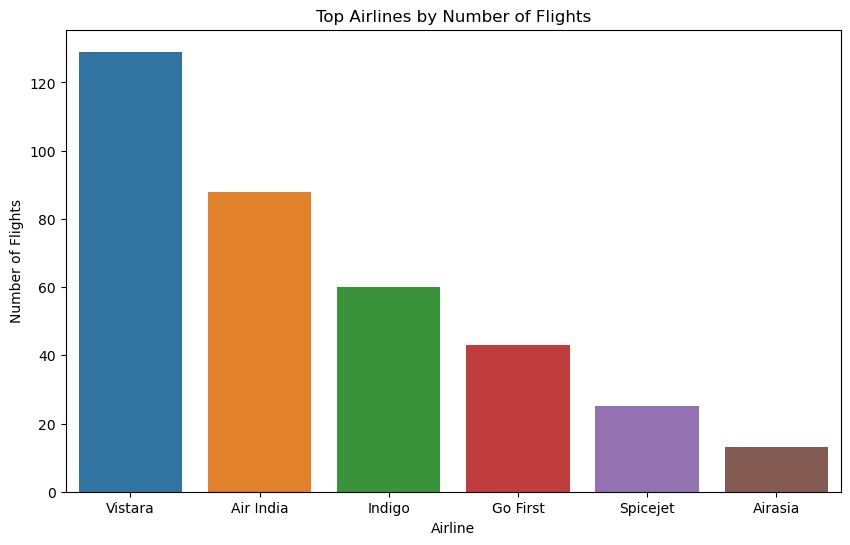

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', data=df, order=df['airline'].value_counts().index)
plt.title('Top Airlines by Number of Flights')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

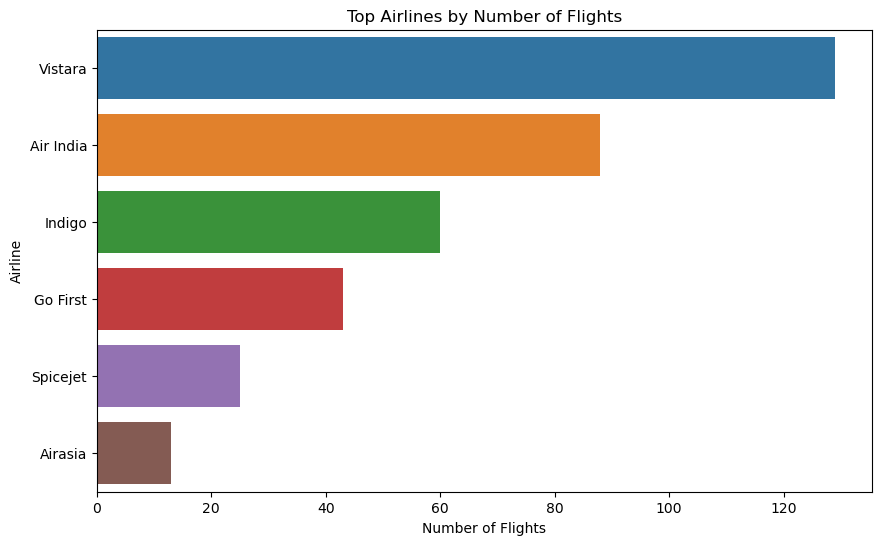

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index)
plt.title('Top Airlines by Number of Flights')
plt.ylabel('Airline')
plt.xlabel('Number of Flights')
plt.show()

**Time Series Analysis of Prices**show()

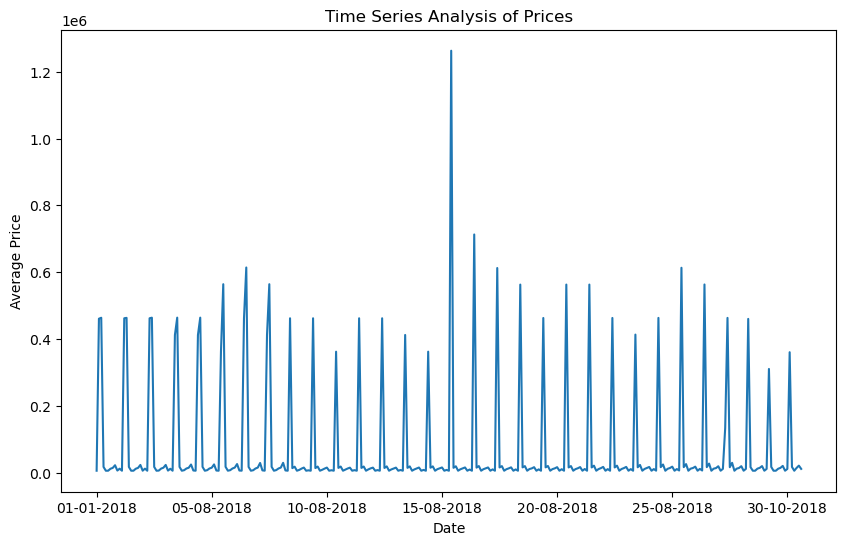

In [65]:
plt.figure(figsize=(10, 6))
df.groupby('date')['price'].mean().plot()
plt.title('Time Series Analysis of Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

**Relationship between Class and Price**

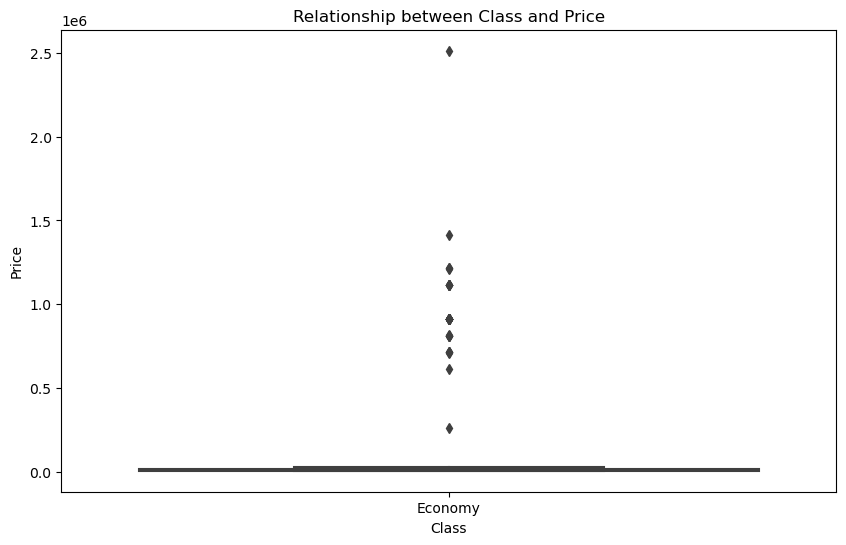

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=df)
plt.title('Relationship between Class and Price')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

**source city**

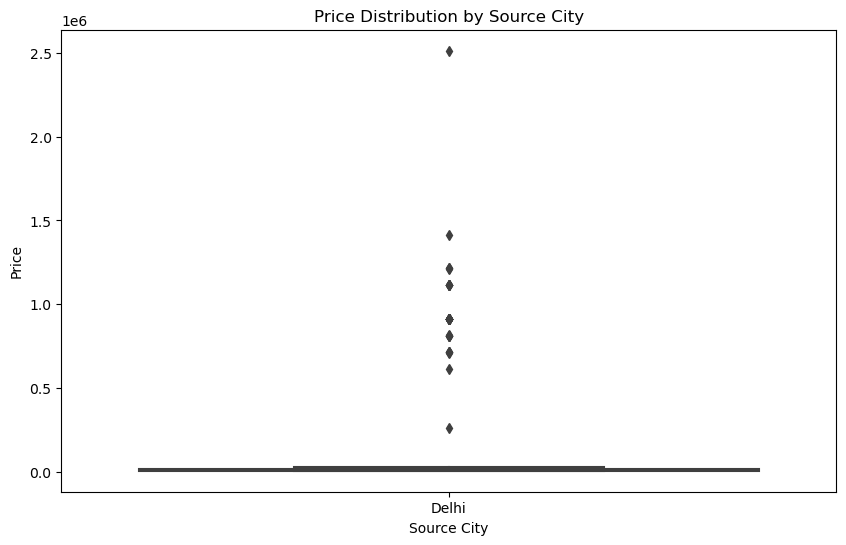

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='source_city', y='price', data=df)
plt.title('Price Distribution by Source City')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.show()

**Relationship between Departure Time and Price**

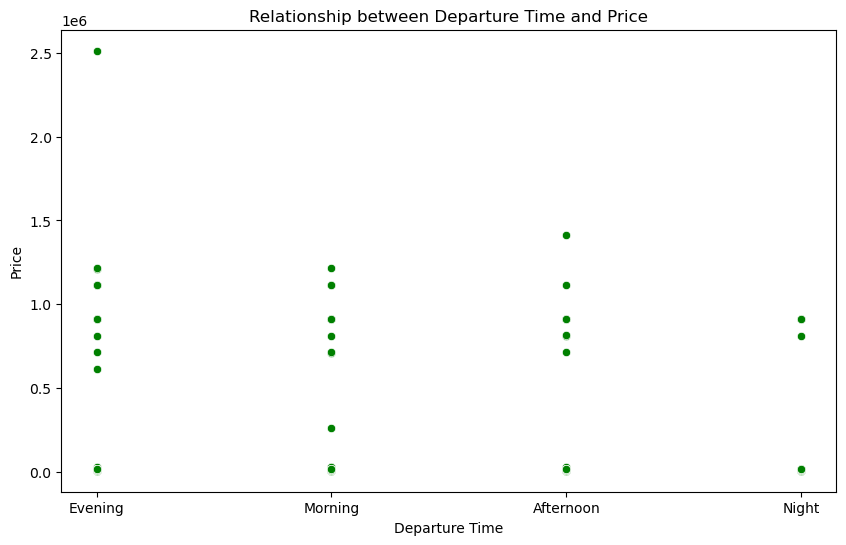

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='departure_time', y='price', data=df , color='green')
plt.title('Relationship between Departure Time and Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.show()

**Relationship between Class and Price-**

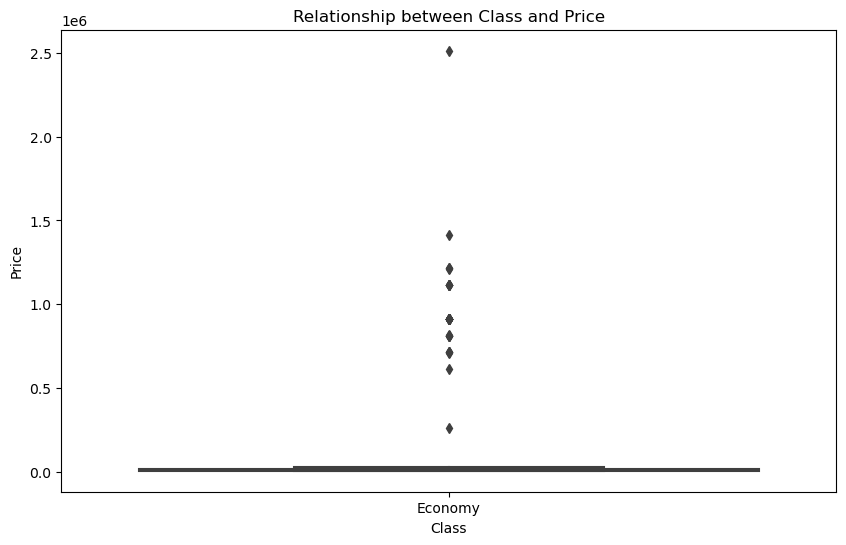

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=df)
plt.title('Relationship between Class and Price')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

*DEPARTURE TIME AND NUMBER OF FLIGHTS*

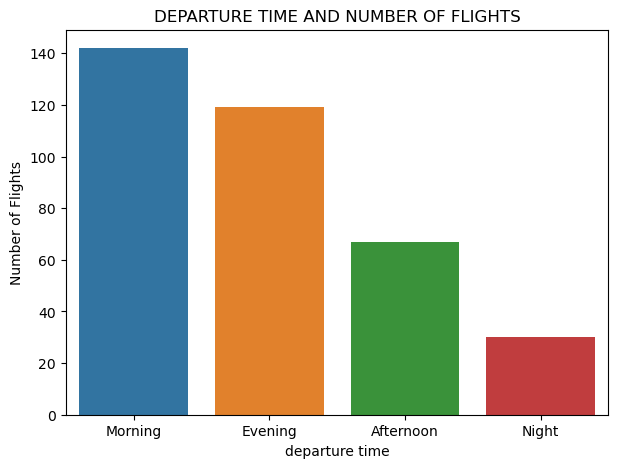

In [99]:
plt.figure(figsize=(7,5))
sns.countplot(x='departure_time', data=df, order=df['departure_time'].value_counts().index)
plt.title('DEPARTURE TIME AND NUMBER OF FLIGHTS')
plt.xlabel('departure time')
plt.ylabel('Number of Flights')
plt.show()

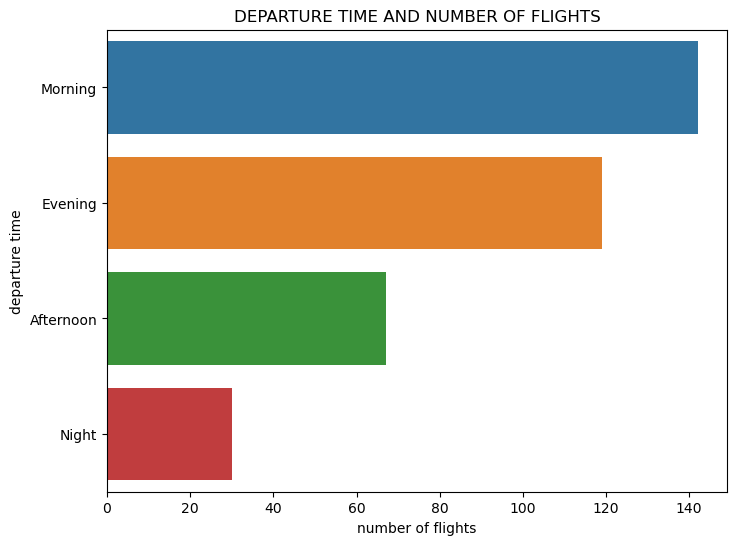

In [100]:
plt.figure(figsize=(8,6))
sns.countplot(y='departure_time',data=df, order=df['departure_time'].value_counts().index)
plt.title("DEPARTURE TIME AND NUMBER OF FLIGHTS")
plt.xlabel('number of flights')
plt.ylabel('departure time')
plt.show()

**ARRIVAL TIME AND NUMBER OF FLIGHTS**

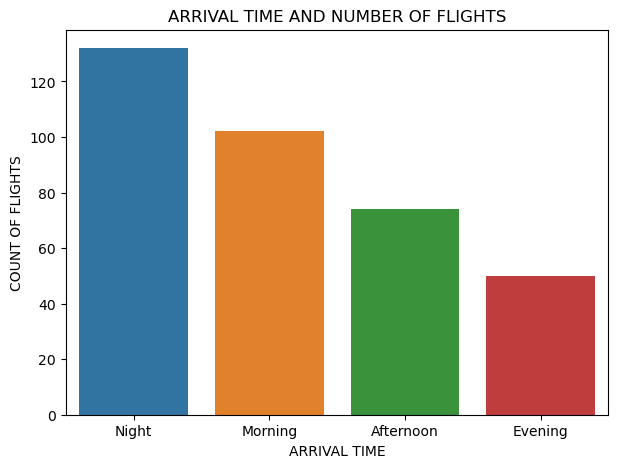

In [101]:
plt.figure(figsize=(7,5))
sns.countplot(x='arrival_time', data=df, order=df['arrival_time'].value_counts().index)
plt.title('ARRIVAL TIME AND NUMBER OF FLIGHTS')
plt.xlabel('ARRIVAL TIME')
plt.ylabel('COUNT OF FLIGHTS')
plt.show()

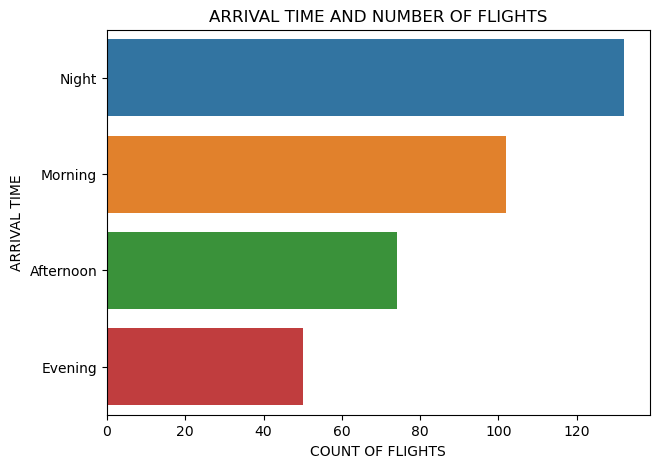

In [105]:
plt.figure(figsize=(7,5))
sns.countplot(y='arrival_time', data=df, order=df['arrival_time'].value_counts().index)
plt.title('ARRIVAL TIME AND NUMBER OF FLIGHTS')
plt.ylabel('ARRIVAL TIME')
plt.xlabel('COUNT OF FLIGHTS')
plt.show()

**DISTRIBUTION OF CLASSES**

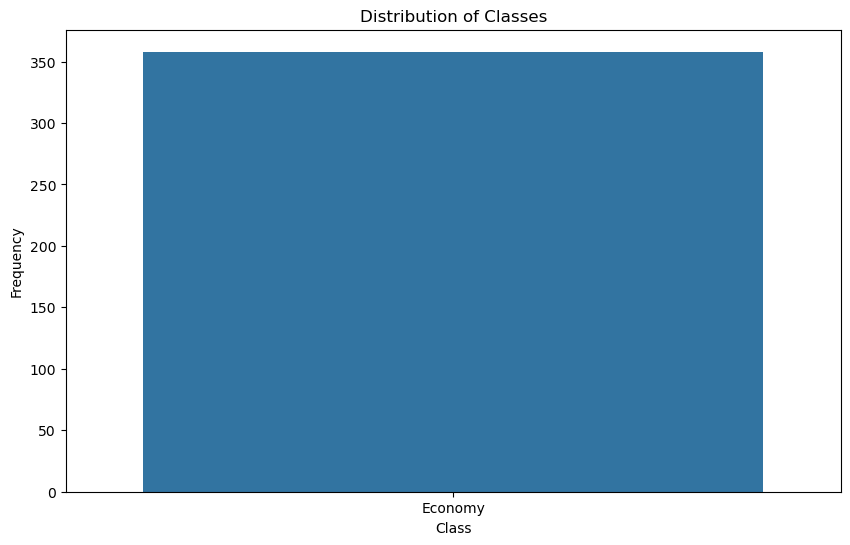

In [108]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

**TOP 5 flights with utmost duration**

In [119]:
data_flights = df.groupby(['flight'], as_index=False)['duration'].sum().sort_values(by='duration', ascending=False).head(5)

<Axes: xlabel='flight', ylabel='duration'>

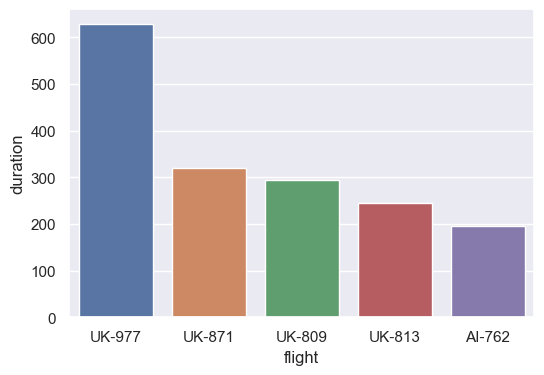

In [120]:
sns.set(rc={'figure.figsize':(6,4)})
sns.barplot(data=data_flights, x = 'flight', y='duration')


**TOP 10 flights with utmost duration**

In [121]:
data_flights = df.groupby(['flight'], as_index=False)['duration'].sum().sort_values(by='duration', ascending=False).head(10)

<Axes: xlabel='flight', ylabel='duration'>

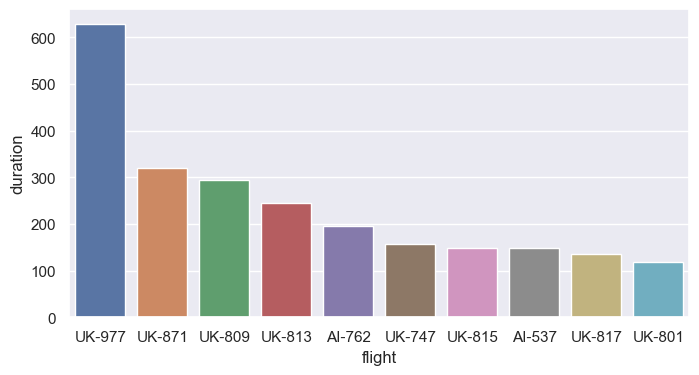

In [122]:
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(data=data_flights, x = 'flight', y='duration')


**relationship between daya left and price**

In [131]:
data_dl = df.groupby(['days_left'], as_index=False)['price'].sum().sort_values(by='price', ascending=False).head(10)

<Axes: xlabel='days_left', ylabel='price'>

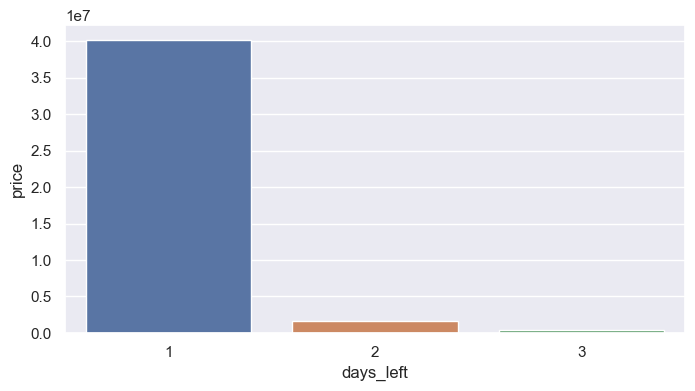

In [132]:
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(data=data_dl, x = 'days_left', y='price')

*HERE IS THE CONCLUSION*

****Airline VISTARA is the TOP 1 , with the highest number of flights, followed by AIR INDIA ( TOP 2).****

****Average price of flight tickets was highest on the daya between *15-08-2018* to *20-08-2018.*****

****There was only ECONOMY class was noticed.****

****Most flights have zero stops, but some have one stop.****

****Source city --> MUMBAI.****

****Desctination city --> DELHI.****

****Highest number of flights are of 1 day travel.****

****Flight *UK-977* is noted has having the most number of flights with highest duration.****

****Most of the flights arrived at **night**, then *morning*, *afteroon* , *evening.*****

****Most of the flights were departured in the **morning**, then *evening*, *afternoon* and *night.*****

****Maximum ticket price: 2512780****

****Minimum ticket price: 5949****

THANKYOU - SATHWIKA 